# MarianNMT on Transformers for Limitless Neural Machine Translation

In some applications, such as in Sentiment Classification, we may not have a model or time to train a model in a spesific language, in these circumstances the first solution that one may consider is to use NMT and the most popular one is through the Google Translate API. However, a heavy connection request to the API might result in an IP ban. The second and obivous choice might be either trying other vendors or taking the advantage of the paid services. In the case where you need to perform heavy translation work and also work in local, you may take the advantage of free MarianNMT on Transformers.

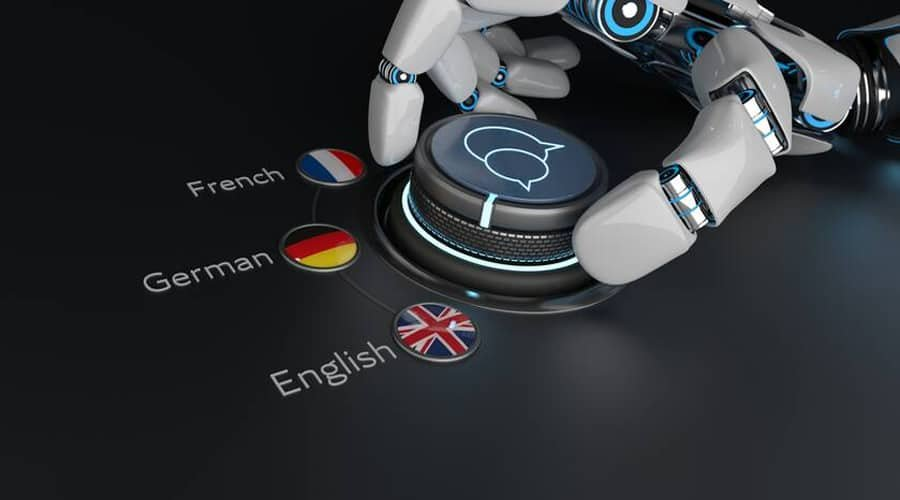
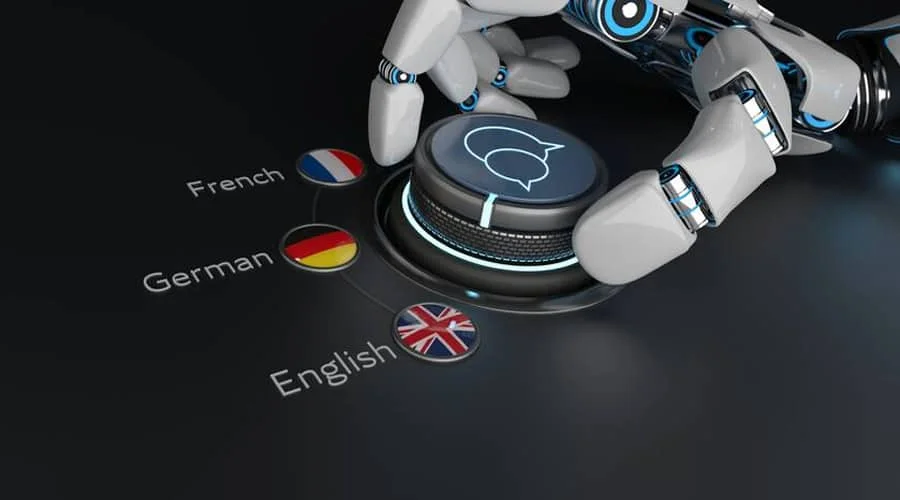

In [1]:
!pip show transformers

Name: transformers
Version: 4.6.1
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Sam Shleifer, Patrick von Platen, Sylvain Gugger, Suraj Patil, Stas Bekman, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: /opt/conda/lib/python3.7/site-packages
Requires: tqdm, filelock, importlib-metadata, huggingface-hub, numpy, tokenizers, requests, packaging, regex, sacremoses
Required-by: checklist, allennlp


In [2]:
import pandas as pd
import numpy as np
import emoji

from transformers import MarianTokenizer, MarianMTModel
from typing import List

A list of language pairs/models can be found on: https://huggingface.co/Helsinki-NLP.

In [3]:
src = 'tr'  # source language
trg = 'en'  # target language
model_name = f'Helsinki-NLP/opus-mt-{src}-{trg}'

model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

In [4]:
def predict(sample_text):
    batch = tokenizer(sample_text, return_tensors="pt")
    gen = model.generate(**batch)
    return tokenizer.batch_decode(gen, skip_special_tokens=True)[0]

In [5]:
predict("Bugün nasılsınız?")

'How are you today?'

In [6]:
def translate_tr_en(trans_list):
    translation_list = []
    for tr in trans_list:
        translation_list.append(predict(tr))
    return translation_list

In [7]:
lst = [
    "Bugün nasılsınız?",
    "Umarım çok güzel bir hafta olur",
    "Bazen sadece kafanızı dinlemeniz gerekir.",
]

translate_tr_en(lst)

['How are you today?',
 "I hope it's a good week.",
 'Sometimes you just have to relax.']